Pymaceuticals Inc.

________________________________________________

Analysis

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", 'Mouse ID'])
data_complete.head()

# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [13]:
# Checking the number of mice.
mice_number = data_complete["Mouse ID"].nunique()
mice_number

249

In [68]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#unique_mice = data_complete["Mouse ID"].unique()
#unique_mice
unique_mice = pd.concat([data_complete['Mouse ID'], data_complete['Timepoint']]).unique()
#unique_mice
#duplicate_mice = pd.concat([data_complete['Mouse ID'], data_complete['Timepoint']]).duplicated()
#duplicate_mice

duplicates = data_complete[data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Returning only the array of duplicate values with dtype=object
duplicate_array_column1 = duplicates['Mouse ID'].values

print(f"array(['g989], dtype=object)")

array(['g989], dtype=object)


In [33]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = data_complete[data_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [153]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#clean_data_complete = data_complete.drop_duplicates()
#clean_data_complete.head()

value_to_remove = 'g989'

# Filter the DataFrame to exclude rows containing the value
clean_data_complete = data_complete[data_complete['Mouse ID'] != value_to_remove]
clean_data_complete#.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [88]:
# Checking the number of mice in the clean DataFrame.

mice_number_clean = clean_data_complete["Mouse ID"].nunique()
mice_number_clean


248

In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped = clean_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate summary statistics for each group
summary_stats = grouped.agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [105]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

advanced_summary_stats = clean_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg({'mean', 'median', 'var', 'std', 'sem'})
advanced_summary_stats.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], advanced_summary_stats.columns])
advanced_summary_stats
#summary_stats

Tumor Volume (mm3)                                           
                            std       mean       sem     median        var
Drug Regimen                                                              
Capomulin              4.994774  40.675741  0.329346  41.557809  24.947764
Ceftamin               6.268188  52.591172  0.469821  51.776157  39.290177
Infubinol              6.567243  52.884795  0.492236  51.820584  43.128684
Ketapril               8.279709  55.235638  0.603860  53.698743  68.553577
Naftisol               8.134708  54.331565  0.596466  52.509285  66.173479
Placebo                7.821003  54.033581  0.581331  52.288934  61.168083
Propriva               6.622085  52.320930  0.544332  50.446266  43.852013
Ramicane               4.846308  40.216745  0.320955  40.673236  23.486704
Stelasyn               7.710419  54.233149  0.573111  52.431737  59.450562
Zoniferol              6.966589  53.236507  0.516398  51.818479  48.533355

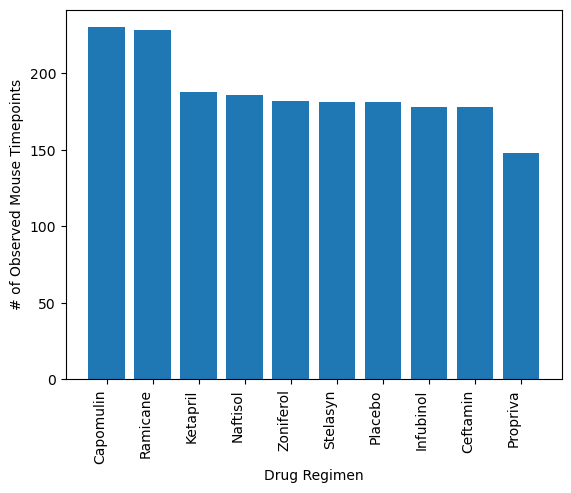

In [119]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#counts of each drug regimen
drug_category_counts = clean_data_complete['Drug Regimen'].value_counts()

#plotting
plt.bar(drug_category_counts.index, drug_category_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90, ha='right')
plt.show()

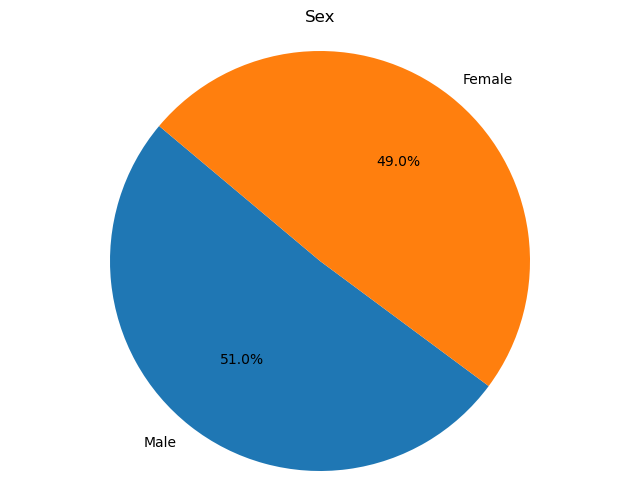

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# counts of each sex
sex_category_counts = clean_data_complete['Sex'].value_counts()

#plotting
plt.figure(figsize=(8, 6))
plt.pie(sex_category_counts, labels=sex_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sex')
plt.show()

In [158]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Filter the DataFrame based on the four treatment regimens
filtered_clean_data_complete = clean_data_complete[clean_data_complete['Drug Regimen'].isin(four_treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_clean_data_complete.groupby('Mouse ID')['Timepoint'].max()

final_tumor_volume = filtered_clean_data_complete.loc[filtered_clean_data_complete.groupby('Mouse ID')['Timepoint'].idxmax(), 'Tumor Volume (mm3)']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data_final_tumor = pd.merge(final_tumor_volume, clean_data_complete, how="left")
merged_data_final_tumor.head()

,Tumor Volume (mm3),Mouse ID,Timepoint,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,67.973419,a203,45,2,Infubinol,Female,20,23
1,65.525743,a251,45,1,Infubinol,Female,21,25
2,62.999356,a275,45,3,Ceftamin,Female,20,28
3,38.407618,a411,45,1,Ramicane,Male,3,22
4,43.047543,a444,45,0,Ramicane,Female,10,25


In [174]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = final_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volumes is: {lowerq}")
print(f"The upper quartile of Tumor Volumes is: {upperq}")
print(f"The interquartile range of Tumor Volumes is: {iqr}")
print(f"The the median of Tumor Volumes is: {quartiles[0.5]} ")

# Locate the rows which contain mice on each drug and get the tumor volumes
grouped_data = merged_data_final_tumor.groupby('Drug Regimen')
# add subset 
subset = merged_data_final_tumor.sample(90)
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volumes is: 37.1877438025
The upper quartile of Tumor Volumes is: 59.930261755
The interquartile range of Tumor Volumes is: 22.742517952499995
The the median of Tumor Volumes is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


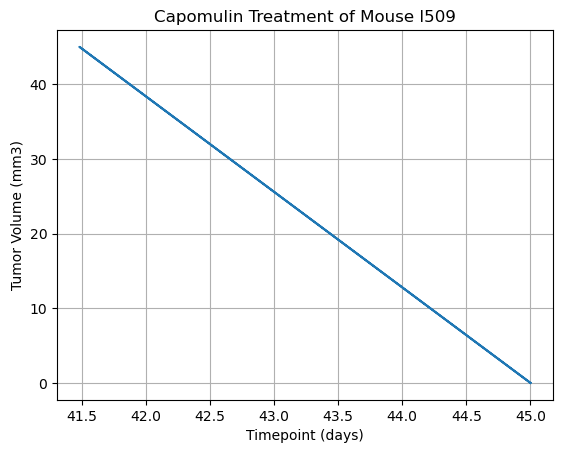

In [181]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

value_to_plot = 'l509'
label_to_plot = 'Capomulin'

# Filter the DataFrame for the specified value and label
filtered_df = merged_data_final_tumor[(merged_data_final_tumor['Mouse ID'] == value_to_plot) & (merged_data_final_tumor['Drug Regimen'] == label_to_plot)]


# Plotting
plt.plot(filtered_df['Tumor Volume (mm3)'], filtered_df['Timepoint'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Capomulin Treatment of Mouse l509")
plt.grid(True)
plt.show()

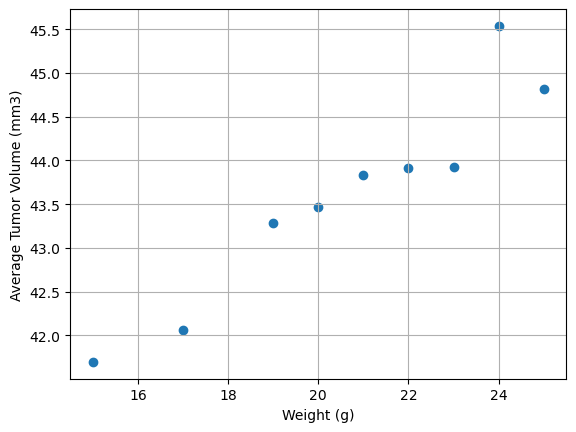

In [183]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

specific_label = 'Capomulin'

# Group by Column3 and calculate the average of Column2 for each group
grouped = merged_data_final_tumor[merged_data_final_tumor['Drug Regimen'] == specific_label].groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

# Generate scatter plot
plt.scatter(grouped.index, grouped.values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

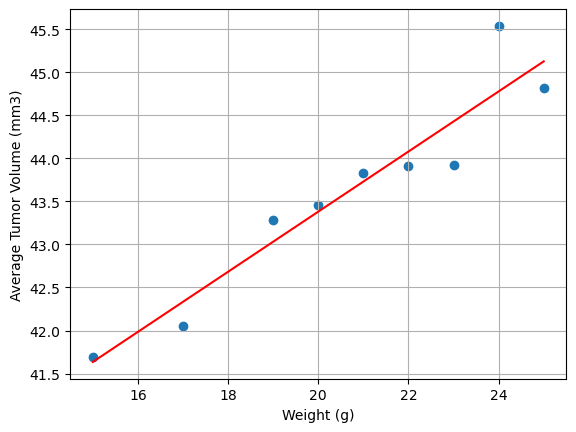

In [186]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy import stats
specific_label = 'Capomulin'

# Group by Column3 and calculate the average of Column2 for each group
grouped = merged_data_final_tumor[merged_data_final_tumor['Drug Regimen'] == specific_label].groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

# Generate scatter plot
plt.scatter(grouped.index, grouped.values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Calculate correlation coefficient
correlation_coefficient, _ = stats.pearsonr(grouped.index, grouped.values)

# Fit linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(grouped.index, grouped.values)
line = slope * grouped.index + intercept
plt.plot(grouped.index, line, color='red')

plt.show()